# Using QuantumGraph

The `quantumgraph` package is designed to help build quantum software using an approach that is different from the one you'll learn in textbooks. Here we'll look into the basics of how it works.

## Setting up

The first step is to install `quantumgraph`. You'll also need to install the `pairwise_tomography` package, which is a vital dependency.

This can be done by pip installing directly from the repositories. This is usually done with the command line, but you can do it in Jupyter notebooks too. The syntax for Jupyter notebooks is as follows.

In [ ]:
!pip install git+https://github.com/if-quantum/pairwise-tomography.git
!pip install git+https://github.com/qiskit-community/QuantumGraph.git

With this things installed, you will need to import the class in which all the magic happens.

In [1]:
from quantumgraph import QuantumGraph

## Initializing qubits

To begin, we set up our qubits using the `QuantumGraph` object. As an example, we'll do four qubits.

In [2]:
n = 4
qubits = QuantumGraph(n)

We keep track of the states of the qubits via a 2-local tomography. This means calculating the single- and two-qubit expectation values.

The single qubit expectation values for a qubit `j` can be accessed as a dictionary using the `get_bloch()` method. Here it is in use.

In [3]:
for j in range(n):
    print('Single qubit expectation values for qubit ' + str(j) + ':')
    print(qubits.get_bloch(j))
    print()

Single qubit expectation values for qubit 0:
{'X': -0.007893880208333334, 'Y': 0.0028483072916666665, 'Z': 1.0}

Single qubit expectation values for qubit 1:
{'X': 0.009440104166666668, 'Y': -0.019449869791666664, 'Z': 1.0}

Single qubit expectation values for qubit 2:
{'X': -0.00830078125, 'Y': -0.007568359375, 'Z': 1.0}

Single qubit expectation values for qubit 3:
{'X': 0.0003255208333333335, 'Y': 0.0107421875, 'Z': 1.0}



The two qubit expectation values for a pair of qubits `j` and `k` can be similarly accessed using the `get_relationship()` method.

In [4]:
for j in range(n-1):
    for k in range(j+1,n):
        print('Two qubit expectation values for qubits ' + str(j) + ' and '  + str(k) + ':')
        print(qubits.get_relationship(j,k))
        print()

Two qubit expectation values for qubits 0 and 1:
{'XX': -0.000244140625, 'XY': -0.000244140625, 'XZ': 0.001708984375, 'YX': 0.01123046875, 'YY': 0.006103515625, 'YZ': -0.000244140625, 'ZX': 0.012451171875, 'ZY': -0.019287109375, 'ZZ': 1.0}

Two qubit expectation values for qubits 0 and 2:
{'XX': -0.002197265625, 'XY': -0.00439453125, 'XZ': -0.0029296875, 'YX': -0.014892578125, 'YY': 0.005615234375, 'YZ': -0.001953125, 'ZX': -0.0078125, 'ZY': -0.02197265625, 'ZZ': 1.0}

Two qubit expectation values for qubits 0 and 3:
{'XX': 0.01025390625, 'XY': 0.007568359375, 'XZ': -0.0224609375, 'YX': 0.019287109375, 'YY': -0.0078125, 'YZ': 0.0107421875, 'ZX': 0.009765625, 'ZY': 0.004638671875, 'ZZ': 1.0}

Two qubit expectation values for qubits 1 and 2:
{'XX': 0.0029296875, 'XY': -0.001708984375, 'XZ': 0.00341796875, 'YX': 0.005126953125, 'YY': -0.00634765625, 'YZ': -0.019775390625, 'ZX': -0.00927734375, 'ZY': 0.021240234375, 'ZZ': 1.0}

Two qubit expectation values for qubits 1 and 3:
{'XX': -0.003

The results we see above show us that we are in the standard $|000\rangle$ initial state, for which

$$\langle Z_j \rangle = \langle Z_j Z_k \rangle = 1 \,\,\,\, \forall j,k$$

All expectation values involving $X$ and $Y$ are zero. Any deviations from this seen above are due to the fact that the expectation values are statistically calculated.

## Manipulating qubits

The qubits can be manipulated using normal quantum gates. For this we can directly manipulate the quantum circuit for the qubits, which can be accessed through the attribute `qc`. Since `QuantumGraph` is built on Qiskit, this circuit is a Qiskit `QuantumCircuit` object.

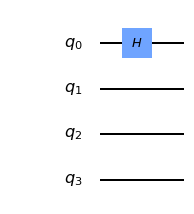

In [5]:
qubits.qc.h(0)
qubits.qc.draw(output='mpl')

Here we applied an `h` gate to qubit 0. However, if we look at the state of this qubit we will find that it has not changed.

In [6]:
qubits.get_bloch(0)

{'X': -0.007893880208333334, 'Y': 0.0028483072916666665, 'Z': 1.0}

This is because we actually have to run the circuit in order to update the tomography. This is done using the `update_tomography()` method.

In [7]:
qubits.update_tomography()
print(qubits.get_bloch(0))

{'X': 1.0, 'Y': -0.0003255208333333335, 'Z': -0.0068359375}

Now we have $\langle X \rangle = 1$ for qubit 0. If you know what an `h` does, this shouldn't come as a surprise (if you didn't know, then now do!).

Another way to manipulate the qubits, which is unique to this method, is to give target values for the expectation values. This is done using the method `set_bloch()`.

For example, to set the state of qubit 1 to $\langle X \rangle = 1$ we use

In [8]:
qubits.set_bloch({'X':1},1)

This automatically updates the tomography (unless the keyword `update=False` is added), so we can already verify that it has the correct effect.

In [9]:
print(qubits.get_bloch(1))

{'X': 0.9998372395833333, 'Y': 0.00341796875, 'Z': 0.0068359375}

The effect was acheived by considering the initial and target tomography, and finding a unitary to get as close to the target as possible.

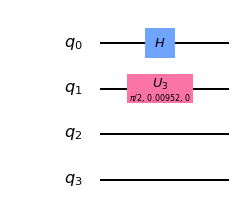

In [10]:
qubits.qc.draw(output='mpl')

It is not as pretty as the off-the-shelf Hadamard gate, but it has the same effect.

The target state for the `set_bloch()` method can include multiple expectation values. For example


In [11]:
qubits.set_bloch({'X':1, 'Z':1},2)

print(qubits.get_bloch(2))

{'X': 0.7180989583333334, 'Y': 0.033121744791666664, 'Z': 0.703125}


Note that it is not actually possible to set both $\langle X \rangle$ and $\langle Z \rangle$ of a qubit to $1$, so `set_bloch` just does the best that is possible. For all single qubit expectation values that do not appear in the target state, it is assumed that the target is to set them to zero. So the target used here is equivalent to `{'X':1, 'Y':0, 'Z':1,}`.


We can perform similar manipulations on pairs of qubits using the `set_relationship` method. Here we do so for qubits 0 and 1.

In [12]:
qubits.set_relationship( {'ZZ':1}, 0,1 )

print(qubits.get_relationship(0,1))

{'XX': 1.0, 'XY': 0.01513671875, 'XZ': 0.038818359375, 'YX': 0.01611328125, 'YY': -1.0, 'YZ': 0.000732421875, 'ZX': 0.0126953125, 'ZY': -0.001708984375, 'ZZ': 1.0}


Unlike `set_bloch`, it is not assumed that expectation values not present in the target should be set to zero. Instead, it is assumed that they should be changed as little as possible.

In the example above, the target is to set $\langle Z_0 Z_1 \rangle = 1$. Note that the state already has $\langle X_0 \rangle = \langle X_0 \rangle = 1$, and therefore $\langle X_0 X_1 \rangle = 1$, from the single qubit manipulations we have already performed. Since $Z_0 Z_1$ and $X_0 X_1$ commute, it is possible to satisfy the target condition on $\langle Z_0 Z_1 \rangle$ while maintaining the value of $\langle X_0 X_1 \rangle$. It is because of this that we end up with a state with $\langle X_0 X_1 \rangle = \langle Z_0 Z_1 \rangle = 1$.

We can also use `set_relationship()` with multiple expectation values in the target. However, unlike for `set_bloch()`, all the corresponding Paulis must commute to get a well defined effect. For example, for qubits 2 and 3.

In [14]:
qubits.set_relationship( {'XZ':1,'ZX':1}, 2,3 )

print(qubits.get_relationship(2,3))

{'XX': -0.0009765625, 'XY': -0.005126953125, 'XZ': 0.99951171875, 'YX': -0.01220703125, 'YY': 1.0, 'YZ': -0.001220703125, 'ZX': 0.99951171875, 'ZY': 0.011962890625, 'ZZ': 0.004638671875}


Both `set_bloch` and `set_relationship` also have a `fraction` keyword argument. If we use $U$ to denote the unitary that would have been applied normally, setting a value for `fraction` applies $U^{\mathtt{fraction}}$ instead.

Let's get a fresh pair of qubits to see an example of this.

In [21]:
qubits = QuantumGraph(2)

print(qubits.get_relationship(0,1))

{'XX': 0.008056640625, 'XY': -0.005859375, 'XZ': 0.010009765625, 'YX': -0.018798828125, 'YY': 0.007080078125, 'YZ': 0.022216796875, 'ZX': -0.0107421875, 'ZY': 0.03515625, 'ZZ': 1.0}


Applying `qubits.set_relationship({'XX':1}, 0,1)` would change the state to get $\langle X_0 X_1 \rangle = 1$. But let's add in `fraction=0.5` and see what happens.

In [22]:
qubits.set_relationship( {'XX':1}, 0,1, fraction=0.5 )

print(qubits.get_relationship(0,1))

{'XX': 0.6943359375, 'XY': 0.014404296875, 'XZ': -0.041259765625, 'YX': 0.01953125, 'YY': -0.700927734375, 'YZ': -0.00732421875, 'ZX': 0.031494140625, 'ZY': 0.047607421875, 'ZZ': 0.997802734375}


Here the value has increased $1/\sqrt{2}$, but not all the way to $1$. In some sense, it is half way there.

If we were to apply exactly the same quantum gate operation again, we would get all the way to $\langle X_0 X_1 \rangle = 1$. However, note that we cannot do this by simply repeating the same command, since this would generate a new gate which rotates halfway between the current initial state and the target state.

In [26]:
qubits.set_relationship( {'XX':1}, 0,1, fraction=0.5 )

print(qubits.get_relationship(0,1))

{'XX': 1.0, 'XY': 0.004150390625, 'XZ': -0.00341796875, 'YX': -0.0029296875, 'YY': -1.0, 'YZ': 0.0205078125, 'ZX': 0.01025390625, 'ZY': 0.033935546875, 'ZZ': 1.0}


# Creating Algorithms

By thinking of terms of the single- and two-qubit expectation values, and by manipulating them using the methods supplied, we can create algorithms to solve problems.

A concrete example of this can be seen in

* ["A quantum procedure for map generation", by James R. Wootton](https://arxiv.org/abs/2005.10327)

where `quantumgraph` is used to implement a rudimentary AI for a Civilization-like game.

Another example is

* ["Determining eigenstates and thermal states on a quantum computer using quantum imaginary time evolution" by Motta, et al.](https://arxiv.org/abs/1901.07653)

which is presents a method for calculating ground states for Hamiltonians of interacting particles. It uses the same basic idea as is implemented in `quantumgraph`, but with a $p$-local tomography in general (for finite $p$) and with its own custom methods to set the expectation values.